In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Question 1 diagrams

In [20]:
# create a line plot with matplotlib for the columns first_review_year(x-axis) and number of listings(y-axis)
q1_years = pd.read_csv('question1_cumulative_average_price.csv')
q1_years.head()

,first_review_year,number_of_listings,cumulative_avg_price_$
0,2009,8,140.000000
1,2010,101,147.891089
2,2011,385,186.423377
3,2012,1251,196.484412
4,2013,3184,181.274183


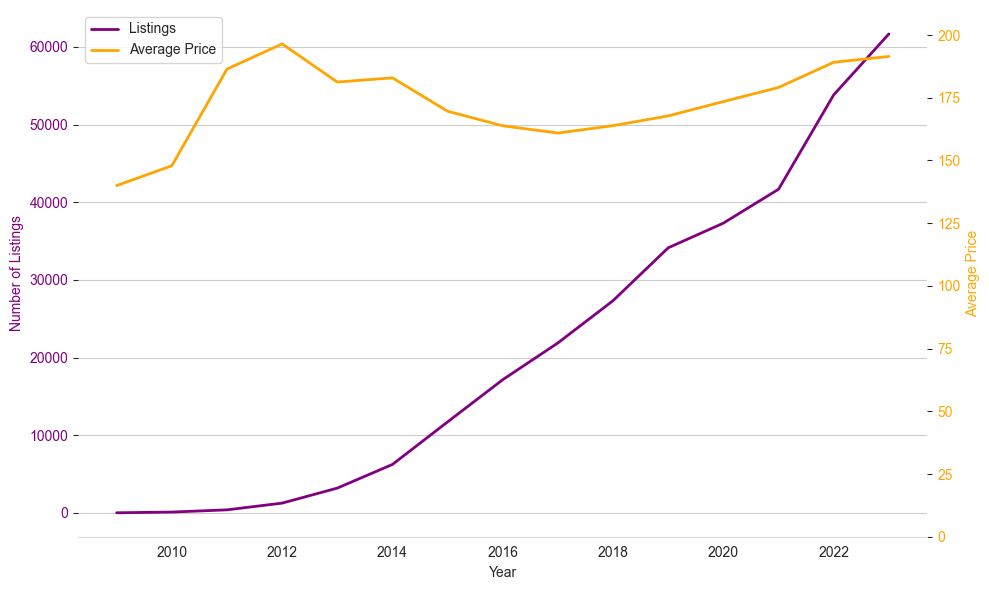

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

# Your data
years = q1_years['first_review_year']
listings = q1_years['number_of_listings']
average_price = q1_years['cumulative_avg_price_$']

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Set the colors for the lines
line_color_listings = 'purple'
line_color_price = 'orange'

# Plot the number of listings on the left y-axis (ax1)
ax1.plot(years, listings, color=line_color_listings, linewidth=2, label='Listings')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Listings', color=line_color_listings)
ax1.tick_params(axis='y', labelcolor=line_color_listings)

# Plot the average price on the right y-axis (ax2)
ax2.plot(years, average_price, color=line_color_price, linewidth=2, label='Average Price')
ax2.set_ylabel('Average Price', color=line_color_price)
ax2.tick_params(axis='y', labelcolor=line_color_price)

# Set the y-axis limit for the right y-axis (ax2)
ax2.set_ylim(0, 210)

# Ensure that the y-axis ticks on the right side are integers
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

# Add legends for both lines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Customize grid settings
ax1.yaxis.grid(True)  # Show horizontal grid lines
ax1.xaxis.grid(False)  # Hide vertical grid lines

# remove the border of the chart
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_color('#DDDDDD')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_color('#DDDDDD')

# Show the plot
fig.tight_layout()
plt.show()

# Question 3 diagrams
### How are the hosts’ listings spread across the arrondissements of Paris and how is this interpreted socially and economically?

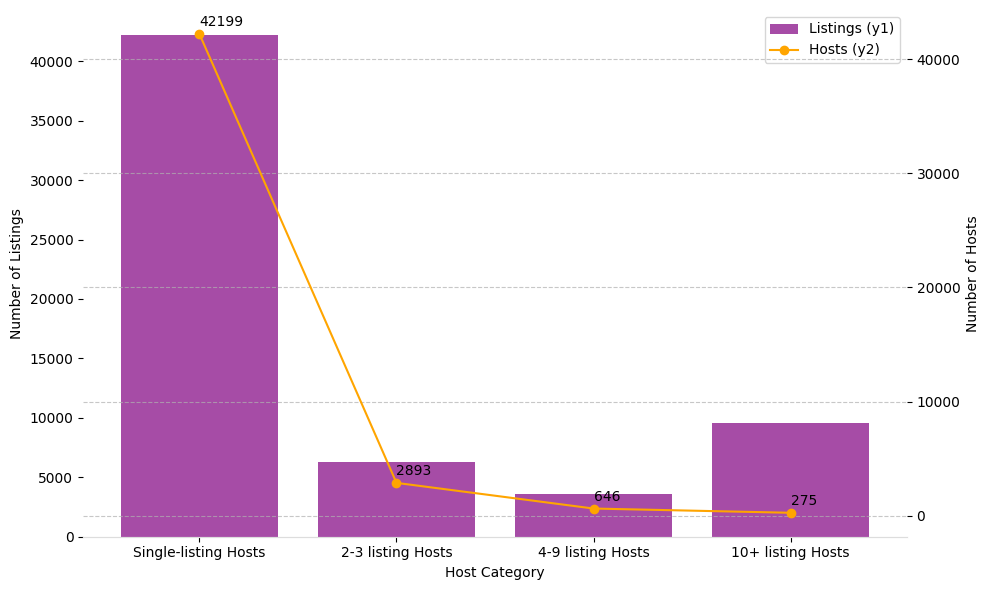

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data from the CSV file
data = pd.read_csv('question3_hosts_group_stats.csv')

# Define colors for the two y-axes
color1 = 'purple'
color2 = 'orange'

# Create a figure with two subplots sharing the same x-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create the first y-axis (y1) for the number of listings
ax1.bar(data['listings_group'], data['total_listings'], color=color1, alpha=0.7, label='Listings (y1)')
ax1.set_xlabel('Host Category')
ax1.set_ylabel('Number of Listings')

# Create the second y-axis (y2) for the number of hosts
ax2 = ax1.twinx()
ax2.plot(data['listings_group'], data['number_of_hosts'], marker='o', color=color2, linestyle='-', label='Hosts (y2)')
ax2.set_ylabel('Number of Hosts')

# Add a legend for both y-axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

# remove the border of the chart
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_color('#DDDDDD')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_color('#DDDDDD')

#in each point of the line plot put the total hosts in that category and place text a little bit higher and to the right of the point
for i, txt in enumerate(data['number_of_hosts']):
    ax2.annotate(txt, (data['listings_group'][i], data['number_of_hosts'][i]), xytext=(data['listings_group'][i], data['number_of_hosts'][i]+700))# add the text to the ax1.legend


# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Geographical plots

In [46]:
# Load the shapefile or GeoJSON file 
gdf = gpd.read_file('neighbourhoods.geojson')

In [47]:
df_question4 = pd.read_csv('question4_results.csv')

In [48]:
# create two dfs , one for the listings_group 1 and for the listings_group labeled 'More than 10' and keep only the n_id, name and the total_listings
df_question4_group1 = df_question4[df_question4['listings_group'] == '1'][['n_id', 'name', 'total_listings']]
df_question4_group2 = df_question4[df_question4['listings_group'] == 'More than 10'][['n_id', 'name', 'total_listings']]
df_question4_group3 = df_question4[df_question4['listings_group'] == '4-9'][['n_id', 'name', 'total_listings']]


In [49]:
df_question4_group1

,n_id,name,total_listings
0,18,Buttes-Montmartre,5532
1,11,Popincourt,4261
2,15,Vaugirard,3304
3,10,Entrepôt,3167
4,17,Batignolles-Monceau,2891
5,20,Ménilmontant,2828
6,19,Buttes-Chaumont,2827
7,16,Passy,2092
8,12,Reuilly,1857
9,9,Opéra,1838


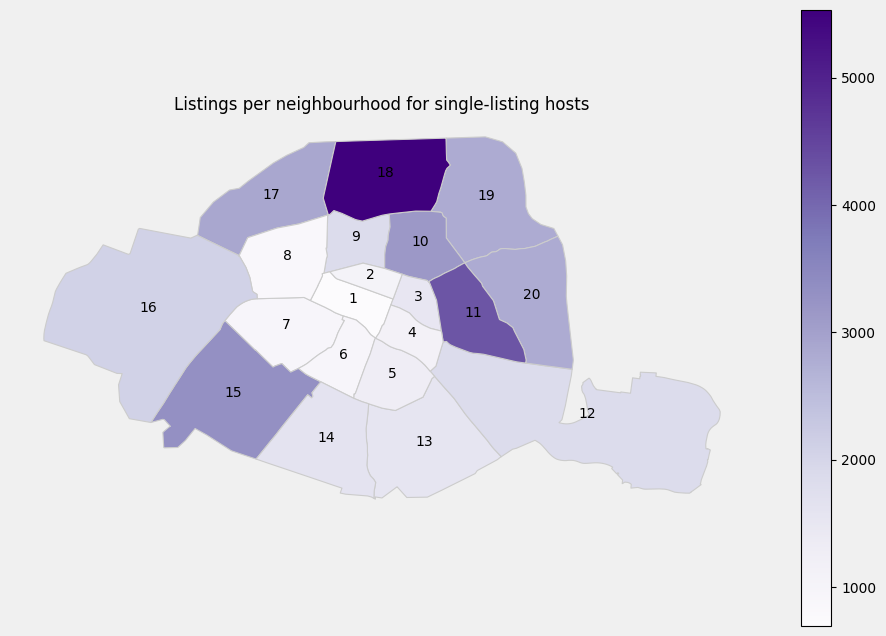

In [73]:
import matplotlib.pyplot as plt

merged_gdf = gdf.merge(df_question4_group1, left_on='neighbourhood', right_on='name', how='left')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# make background color of picture a light gray, not with facecolor nor set_facecolor
fig.set_facecolor('#F0F0F0')

# Add a label for the legend of the diagram
ax.set_title('Listings per neighbourhood for single-listing hosts')

# Plot the neighborhoods with colors based on 'total_listings'
merged_gdf.plot(column='total_listings', cmap='Purples', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
# give its arrondissement a number inside the demarcation
for idx, row in merged_gdf.iterrows():
    plt.annotate(text=row['n_id'], xy=row['geometry'].centroid.coords[0], horizontalalignment='center', fontsize=10, color='black')

# no axis
plt.axis('off')

# Show the heatmap
plt.show()

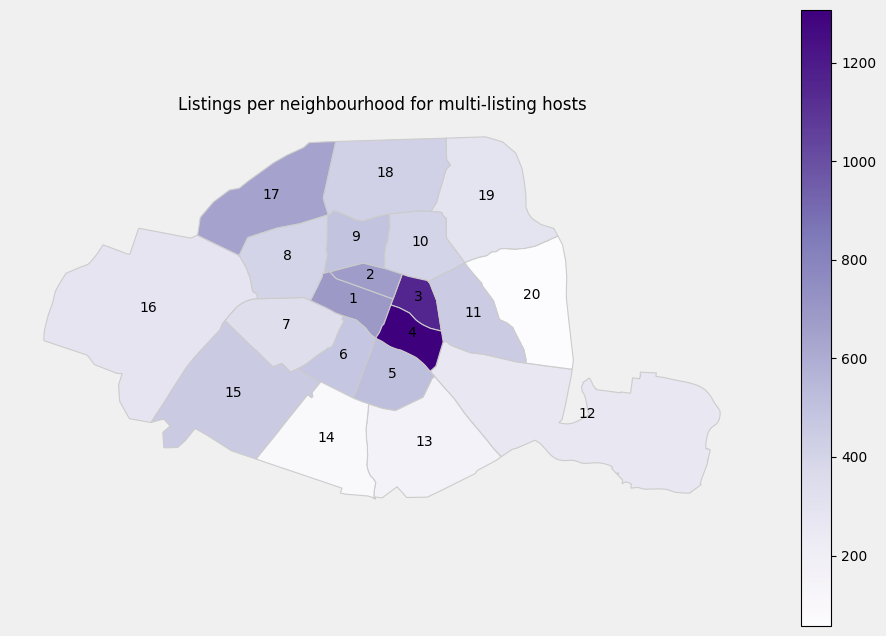

In [72]:
merged_gdf = gdf.merge(df_question4_group2, left_on='neighbourhood', right_on='name', how='left')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# make background color of picture a light gray, not with facecolor nor set_facecolor
fig.set_facecolor('#F0F0F0')

# Add a label for the legend of the diagram
ax.set_title('Listings per neighbourhood for multi-listing hosts')

# Plot the neighborhoods with colors based on 'total_listings'
merged_gdf.plot(column='total_listings', cmap='Purples', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
# give its arrondissement a number inside the demarcation
for idx, row in merged_gdf.iterrows():
    plt.annotate(text=row['n_id'], xy=row['geometry'].centroid.coords[0], horizontalalignment='center', fontsize=10, color='black')

# no axis
plt.axis('off')

# Show the heatmap
plt.show()



# Question 4 diagrams
### Map of price per arrondissement

In [52]:
q4_price = pd.read_csv("question4_price_per_arrondissements.csv")

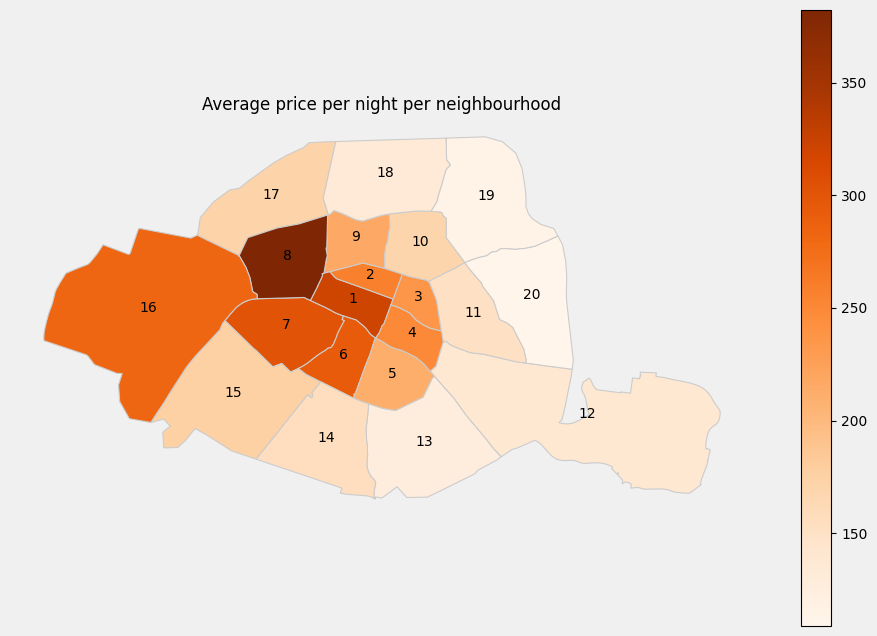

In [71]:
# in a similar way as the above map diagrams, create a map diagram for the average price per arrondissement
merged_gdf = gdf.merge(q4_price, left_on='neighbourhood', right_on='name', how='left')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# make background color of picture a light gray, not with facecolor nor set_facecolor
fig.set_facecolor('#F0F0F0')

# Add a label for the legend of the diagram
ax.set_title('Average price per night per neighbourhood')

# Plot the neighborhoods with colors based on 'total_listings'
merged_gdf.plot(column='average_price_per_night_per_neighbourhood', cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
# give its arrondissement a number inside the demarcation
for idx, row in merged_gdf.iterrows():
    plt.annotate(text=row['n_id'], xy=row['geometry'].centroid.coords[0], horizontalalignment='center', fontsize=10, color='black')

# no axis
plt.axis('off')

# Show the heatmap
plt.show()

# Question 5 diagrams

ValueError: 'custom_purple_gradient' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

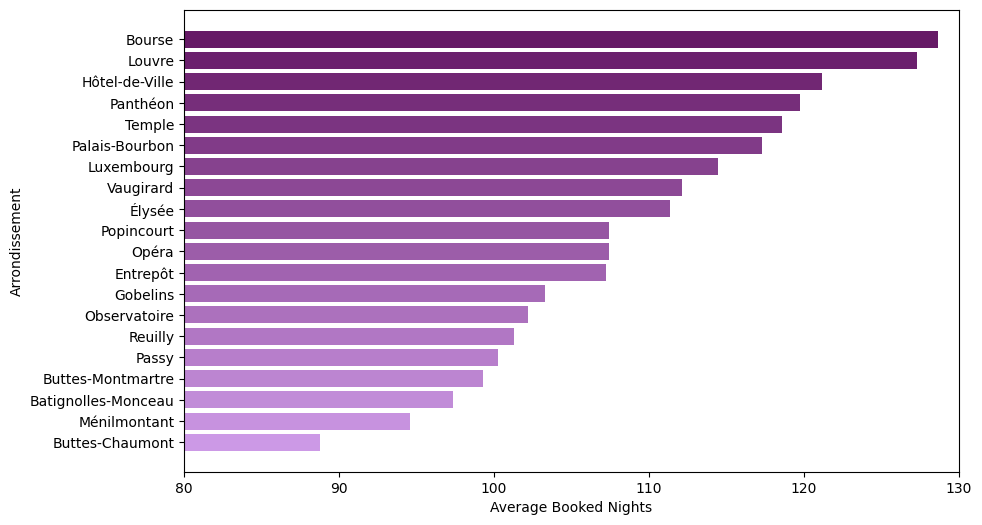

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

q5 = pd.read_csv('q5_bookednights_arrondissement.csv')

#reverse the order of the rows
q5 = q5.iloc[::-1]

# Define a custom colormap with a gradient of purple colors
colors = [(0.8, 0.6, 0.9),(0.4, 0.1, 0.4)]  # Light purple to dark purple gradient
cmap_name = 'custom_purple_gradient'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=len(q5))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a horizontal bar plot
bars = ax.barh(q5['name'], q5['average_booked_nights'], color=cm(np.arange(len(q5))))

# Add labels and title
ax.set_xlabel('Average Booked Nights')
ax.set_ylabel('Arrondissement')

# make the x limits from 80 to 130
ax.set_xlim(80, 130)

# Add a colorbar to show the color gradient
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap_name), ax=ax)
cbar.set_label('Color Gradient')

# Show the plot
plt.tight_layout()
plt.show()

# Question 6
### Income per hosts category

In [104]:
q6_income = pd.read_csv('q6_hosts.csv')
q6_income.head()
#reverse order of df
q6_income = q6_income.iloc[::-1]

ValueError: 'custom_orange_gradient' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

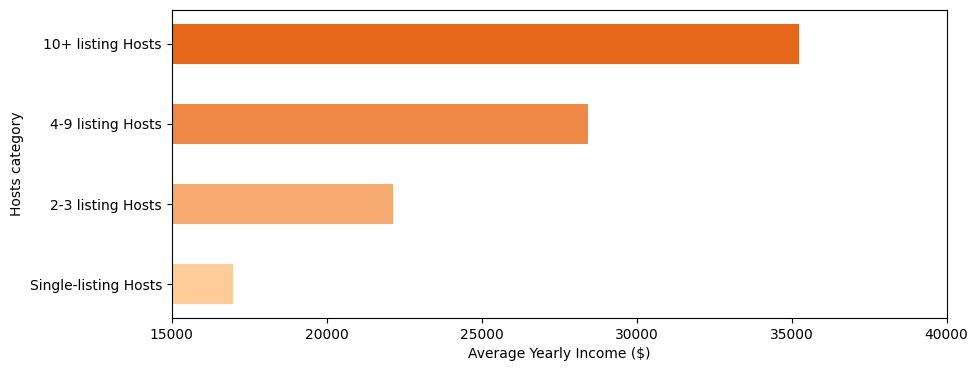

In [114]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# Create a horizontal bar plot
bars = ax.barh(q6_income['hosts_group'], q6_income['average_yearly_income'], color=cm(np.arange(len(q6_income))), height=0.5)

# Add labels and title
ax.set_xlabel('Average Yearly Income ($)')
ax.set_ylabel('Hosts category')

ax.set_xlim(15000, 40000)

# Define a custom colormap with a gradient of orange colors
colors = [(1, 0.8, 0.6),(0.9, 0.4, 0.1)]  # Light orange to dark orange gradient
cmap_name = 'custom_orange_gradient'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=len(q6_income))

# Add a colorbar to show the color gradient
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap_name), ax=ax)
cbar.set_label('Color Gradient')

# Show the plot
plt.tight_layout()
plt.show()

## Heatmap for price per arrondissement per group 

In [145]:
# create a 20x4 heatmap with seaborn for the correlation matrix of arronssement and the average price per hosts group per arrondissement
import seaborn as sns

# Load the data
df = pd.read_csv("question6_price_per_arrondissement_per_group.csv")

# Concatenate unique n_id with name
df['n_id'] = df['n_id'].astype(str) + ' - ' + df['name']

# Create a pivot table
df_pivot = df.pivot(index='n_id', columns='hosts_group', values='average_arrondissement_price_for_category')

#create a new column id with the n_id as integer which is before the dash in each n_id row
df_pivot['id'] = df_pivot.index.str.split(' - ').str[0].astype(int)

#order by id
df_pivot = df_pivot.sort_values(by=['id'])

# rearrange columns
df_pivot = df_pivot[['Single-listing Hosts', '2-3 listing Hosts', '4-9 listing Hosts', 'Multi-listing Hosts']]
df_pivot.head()

hosts_group,Single-listing Hosts,2-3 listing Hosts,4-9 listing Hosts,Multi-listing Hosts
n_id,,,,
1 - Louvre,216.64,197.23,587.74,552.47
2 - Bourse,185.81,230.41,341.36,406.75
3 - Temple,180.84,204.29,267.07,317.28
4 - Hôtel-de-Ville,195.69,201.38,352.89,292.95
5 - Panthéon,165.07,251.52,264.10,340.00


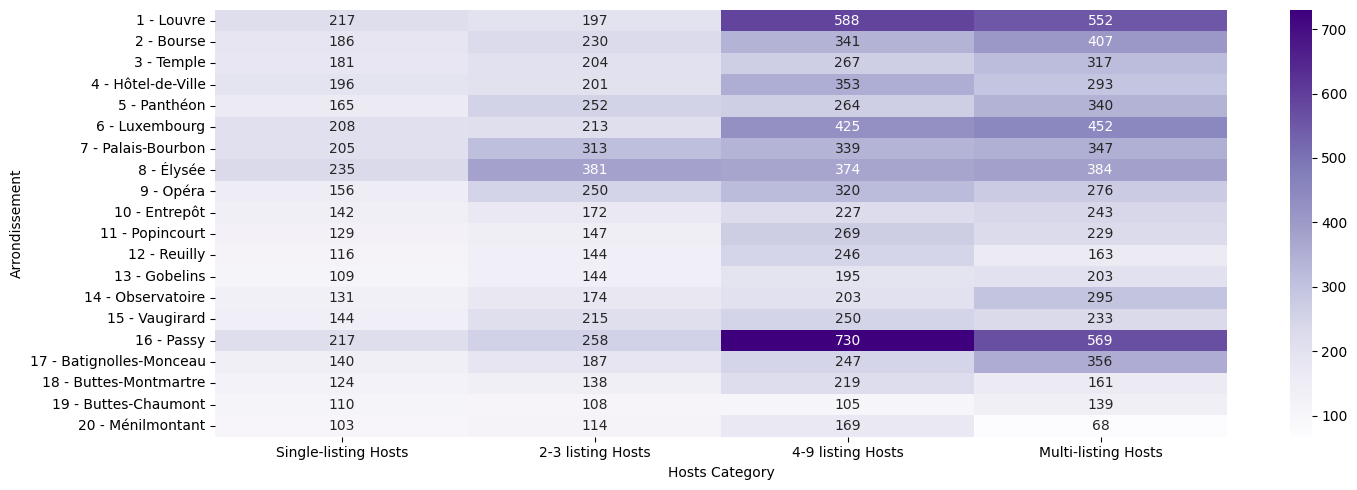

In [147]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df_pivot, annot=True, cmap='Purples', fmt='.0f')

# Add labels and title
ax.set_xlabel('Hosts Category')
ax.set_ylabel('Arrondissement')

#make lines wider
ax.hlines(*ax.get_xlim(), linewidth=10, xmax=4)

# Show the plot
plt.tight_layout()
plt.show()